In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
import glob
import torch
from torchvision.transforms import ToTensor
from PIL import UnidentifiedImageError

/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
merge_df = pd.read_csv("data/merge_df.csv")
len(merge_df)

12370

In [3]:
class MetaData:
    def __init__(self):
        super().__init__()
        self.image_df_path()
        self.merging_dfs()
        self.dict_of_cats()

    def image_df_path(self):
        self.image_paths = glob.glob('data/new_images/*.jpg')
        self.image_name = [x.split('/')[-1].split('.')[0] for x in self.image_paths]
        self.image_df = pd.DataFrame({'image_name': self.image_name})
    #image_df

    def merging_dfs(self):
        #concat images df with merge_df
        self.merge_df = pd.read_csv("data/merge_df.csv")
        self.new_merge = pd.concat([self.merge_df, self.image_df], axis=1, ignore_index=False)
        #fill the NaN values of main_category with any main_category value to make the length same 
        self.new_merge['main_category'] = self.new_merge['main_category'].fillna('video_games_consoles')
        #drop the unnecessary columns and only keep img_name and main_category
        self.new_merge.drop(['id_x','Unnamed: 0.1', 'Unnamed: 0', 'product_id', 'bucket_link',
                    'image_ref', 'create_time', 'id_y', 'product_name', 'category',
                        'product_description', 'price', 'location',
                    'geo_location', 'longiude_latitude'], axis=1, inplace=True)
        #new_merge

    def dict_of_cats(self):
        #create a dictionary of categories
        self.cat_dict = set(self.new_merge['main_category'])
        self.cat_dict = {k: v for v, k in enumerate(self.cat_dict)}
        # replace the category column with the index of the category
        self.new_merge['main_category'] = self.new_merge['main_category'].map(self.cat_dict)
        #cat_dict

    def img_cat_dataset(self, index: int): 
    #for index, img in enumerate(image_paths):
        image = self.new_merge['image_name'][index]
        image = Image.open('data/new_images/' + image + '.jpg')
        image = np.array(image)
        image = torch.tensor(image)
        image = torch.flatten(image)
        image = image.numpy()
        category = self.new_merge['main_category'][index]
        #image_list.append(image)
        #cat_list.append(category)
        return image, category
        #train_list = image, category
        #print(cat_list)
meta_model = MetaData()
dataset = []
array_size = 49152
n = len(meta_model.new_merge)
X = np.zeros((n, array_size))
y = np.zeros(n)

In [4]:
from numpy import random
indexes = list(range(n))
random.shuffle(indexes)

for idx in indexes:
    #dataset = image_list, cat_list
    dataset.append(meta_model.img_cat_dataset(idx))
    #print(dataset)
    
for idx in range(n):    
    features, label = dataset[idx]
    print(features.shape)
    X[idx, :] = features
    y[idx] = label
    #rint(y[idx])

(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(49152,)
(

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:

#f_X = list(new_merge['img_array'])
#X = [x.numpy() for x in f_X]
#y = new_merge['main_category']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = LogisticRegression(solver='saga', penalty='none', multi_class='multinomial')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print('train scaled')
X_test = scaler.transform(X_test)
print('test scaled')

train scaled
test scaled


In [8]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)


/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
print(y_test[10])
print('Predicted Class is: %d' % predictions[10])

print(y_test[44])
print('Predicted Class is: %d' % predictions[44])

3.0
Predicted Class is: 9
1.0
Predicted Class is: 5


In [10]:
from sklearn import metrics

score = model.score(X_test, y_test)
print(score)

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

0.0847145488029466
[[16 12 19 17 13 21 11 14 15 18 14 15 18]
 [17 18 20 15 16 27 18 15 25 31 25 15 18]
 [14 23 27 21 14 20 24 26 17 49 26 17 28]
 [13 17 27 37 27 34 20 16 20 43 32 19 35]
 [23 12 28 33 17 13 24  8 19 43 29 15 26]
 [12 23 27 28 23 31 19 11 19 33 37 10 28]
 [11 16 29 18 22 15 17 11 13 30 23 19 26]
 [11 18 17 20 11 13 12 17 15 30 24  9 22]
 [18 15 25 25 17 21 22 14 26 21 26 20 26]
 [19 22 38 47 25 41 37 27 40 50 30 22 38]
 [ 9 19 37 37 24 25 18 25 29 47 21 28 35]
 [11 11 13 15  9 25 18 13 18 29 23 12 23]
 [ 7 26 37 28 25 22 20 27 22 43 35 21 33]]


In [11]:
print(len(y_test))

3801


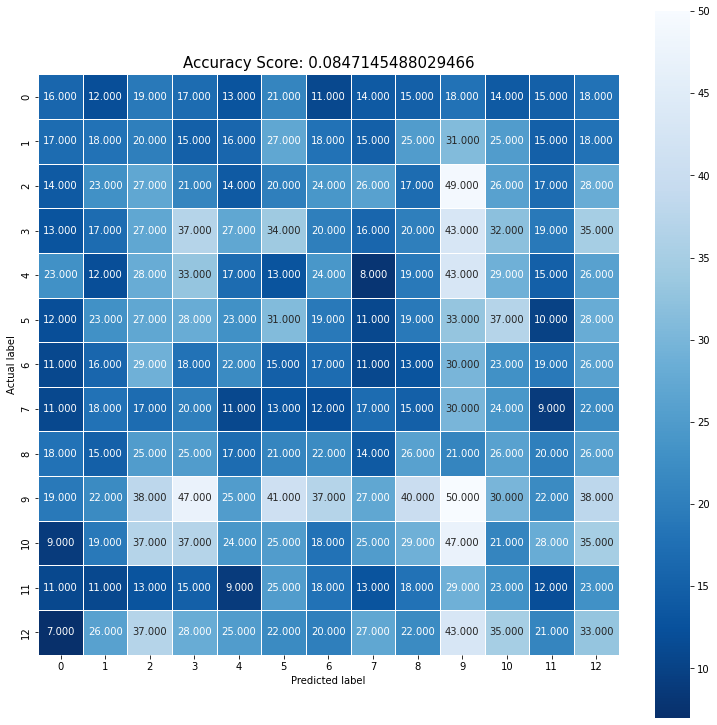

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [13]:
prediction_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': predictions})
prediction_df

,Real Values,Predicted Values
0,6.0,9.0
1,11.0,12.0
2,2.0,1.0
3,5.0,2.0
4,8.0,1.0
...,...,...
3796,9.0,9.0
3797,0.0,7.0
3798,4.0,9.0
3799,8.0,2.0


Text(0.5, 1.0, 'Overall accuracy score: 0.0847145488029466')

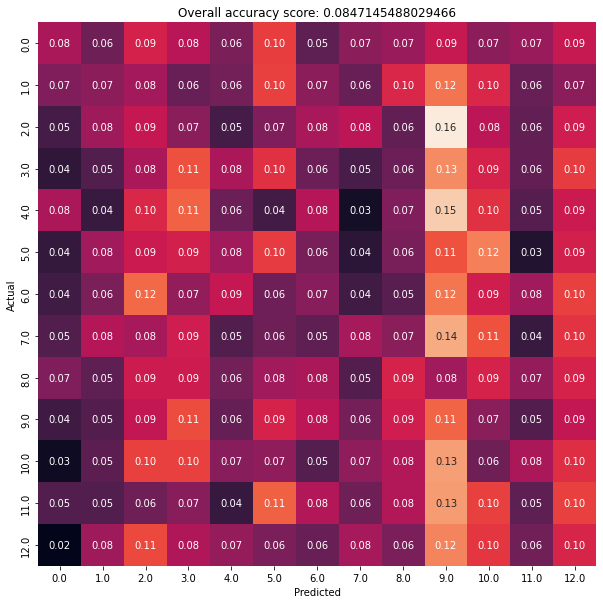

In [15]:
cm = pd.crosstab(y_test, predictions, 
                               rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
p.set_title(f'Overall accuracy score: {score}')
